Nb nodes ToS:  13186


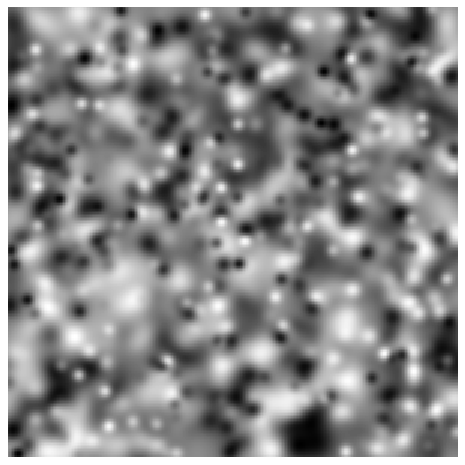

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [1]:
from helper import *

# Image must be an 8-bit gray-level image
image = io.imread('images/gaussians.png')

# ToS construction
tos = TreeOfShapes(image)
print('Nb nodes ToS: ', tos.get_nb_nodes())

image = Image.fromarray(tos.reconstruct_image())
imshow(image, cmap='gray', figsize=(300,300))

CToS: 13438 nodes.
TToS: 971 nodes.


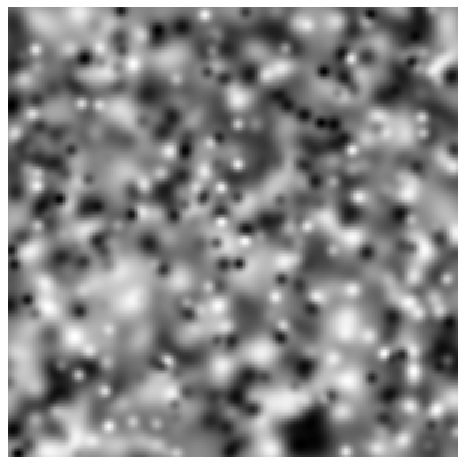

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [2]:
from topologicaltos import *

# Topological Tree of Shapes computation
ttos = TopologicalToS(tos)

# Reconstruction of the original image
image_ttos = ttos.reconstruct_img('orig')
imshow(image_ttos, cmap='gray', figsize=(300,300))

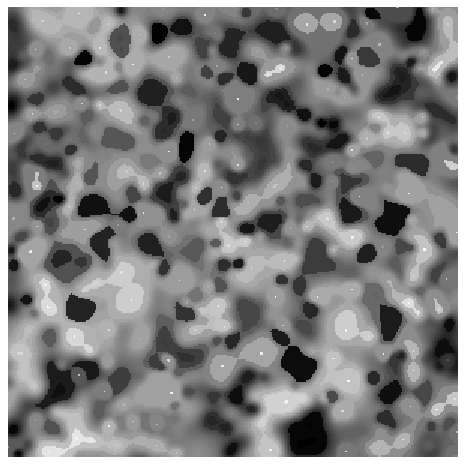

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [5]:
image_ttos = ttos.reconstruct_img('quasi_opening')
imshow(image_ttos, cmap='gray', figsize=(300,300))

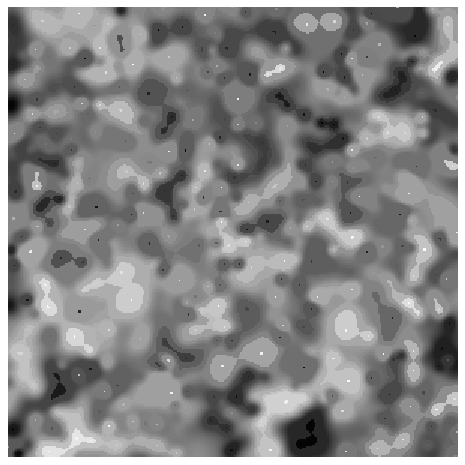

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [4]:
image_ttos = ttos.reconstruct_img('higher')
imshow(image_ttos, cmap='gray', figsize=(300,300))

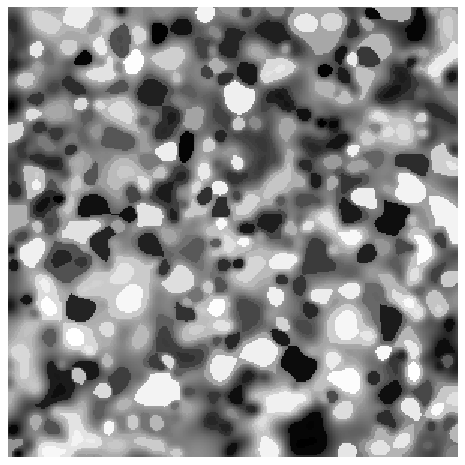

(<Figure size 450x450 with 1 Axes>, <Axes: >)

In [5]:
image_ttos = ttos.reconstruct_img('lower')
imshow(image_ttos, cmap='gray', figsize=(300,300))